In [142]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn


In [143]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# THE DATASET
Before you start, go to the link: https://apps.who.int/gho/data/view.gisah.GDO2107v?lang=en & watch the "Download the dataset" video from section 7 to download the dataset. It shows how the blood pressure in countries has varied from 1975 to 2015. Each year has separate columns for "Both Sexes", "Male" and "Female". The values in the table are in the string format: "{average} [{range}]". The data will need to be cleaned before it can be visualized.

In [144]:
df = pd.read_csv('data/raw_blood_pressure_data.csv')

In [145]:
df.head()

,Unnamed: 0,2015,2015.1,2015.2,2014,2014.1,2014.2,2013,2013.1,2013.2,...,1978.2,1977,1977.1,1977.2,1976,1976.1,1976.2,1975,1975.1,1975.2
0,NaN,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...
1,NaN,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,...,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years
2,Country,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,...,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female
3,Afghanistan,30.6 [23.6-38.3],30.4 [20.4-41.6],30.7 [21.2-41.3],30.6 [23.9-37.8],30.4 [21.0-41.0],30.6 [21.5-40.7],30.5 [24.1-37.3],30.4 [21.4-40.4],30.5 [21.9-40.0],...,23.9 [14.4-34.9],24.6 [17.3-32.9],25.4 [15.0-38.1],23.7 [13.8-35.2],24.4 [16.9-33.1],25.2 [14.5-38.5],23.4 [13.3-35.6],24.2 [16.4-33.3],25.1 [13.9-38.9],23.2 [12.7-35.9]
4,Albania,29.0 [22.4-36.2],33.0 [23.0-44.3],25.0 [16.8-34.7],29.2 [23.0-36.0],33.2 [23.9-43.7],25.3 [17.5-34.5],29.5 [23.6-35.8],33.3 [24.7-43.1],25.6 [18.3-34.1],...,30.9 [21.0-42.6],32.8 [24.9-41.3],34.4 [22.9-46.9],31.0 [20.5-43.6],33.0 [24.5-42.0],34.5 [22.4-47.7],31.1 [20.1-44.2],33.1 [24.2-42.6],34.6 [21.9-48.6],31.3 [19.7-45.1]


# Objectives:
1. Rename the columns so they display the information from the 3rd row.
2. Remove the first 3 rows.
3. Male the country column the index column.
4. Convert blood pressure daa from having averange and range to just having avarage values.
5. Create a small dataframe which contains only the "Both Sexes" data.
6. Convert the blood prssure data from strings to floats.
7. Transpose the data so it fits seaborn's lineplot method.
8. Reverse teh data so the years ascend from left to right.

# 1. Renaming columns

In [146]:
df.head()

,Unnamed: 0,2015,2015.1,2015.2,2014,2014.1,2014.2,2013,2013.1,2013.2,...,1978.2,1977,1977.1,1977.2,1976,1976.1,1976.2,1975,1975.1,1975.2
0,NaN,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...
1,NaN,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,...,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years
2,Country,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,...,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female
3,Afghanistan,30.6 [23.6-38.3],30.4 [20.4-41.6],30.7 [21.2-41.3],30.6 [23.9-37.8],30.4 [21.0-41.0],30.6 [21.5-40.7],30.5 [24.1-37.3],30.4 [21.4-40.4],30.5 [21.9-40.0],...,23.9 [14.4-34.9],24.6 [17.3-32.9],25.4 [15.0-38.1],23.7 [13.8-35.2],24.4 [16.9-33.1],25.2 [14.5-38.5],23.4 [13.3-35.6],24.2 [16.4-33.3],25.1 [13.9-38.9],23.2 [12.7-35.9]
4,Albania,29.0 [22.4-36.2],33.0 [23.0-44.3],25.0 [16.8-34.7],29.2 [23.0-36.0],33.2 [23.9-43.7],25.3 [17.5-34.5],29.5 [23.6-35.8],33.3 [24.7-43.1],25.6 [18.3-34.1],...,30.9 [21.0-42.6],32.8 [24.9-41.3],34.4 [22.9-46.9],31.0 [20.5-43.6],33.0 [24.5-42.0],34.5 [22.4-47.7],31.1 [20.1-44.2],33.1 [24.2-42.6],34.6 [21.9-48.6],31.3 [19.7-45.1]


In [147]:
df.iloc[0].value_counts()

Raised blood pressure (SBP>=140 OR DBP>=90) (age-standardized estimate)    123
Name: 0, dtype: int64

We will create a function which takes the old column as input and returns a column name with the year and information from row 3, e.g. for column 2, we want to convert '2015' to '2015 (Both Sexes)'

NOTE: We want the 'Unnamed: 0' column to be the 'Country' column

In [148]:
def get_column_name(column):
    if column.name == 'Unnamed: 0':
        return 'Country'
    else:
        return f'{column.name[:4]} ({column.iloc[2]})'
    
print(get_column_name(df['2015']))

2015 (Both sexes)


In [149]:
df.columns = [get_column_name(df[column_name]) for column_name in df.columns]

In [150]:
df.head()

,Country,2015 (Both sexes),2015 (Male),2015 (Female),2014 (Both sexes),2014 (Male),2014 (Female),2013 (Both sexes),2013 (Male),2013 (Female),...,1978 (Female),1977 (Both sexes),1977 (Male),1977 (Female),1976 (Both sexes),1976 (Male),1976 (Female),1975 (Both sexes),1975 (Male),1975 (Female)
0,NaN,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...,Raised blood pressure (SBP>=140 OR DBP>=90) (a...
1,NaN,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,...,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years
2,Country,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,...,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female
3,Afghanistan,30.6 [23.6-38.3],30.4 [20.4-41.6],30.7 [21.2-41.3],30.6 [23.9-37.8],30.4 [21.0-41.0],30.6 [21.5-40.7],30.5 [24.1-37.3],30.4 [21.4-40.4],30.5 [21.9-40.0],...,23.9 [14.4-34.9],24.6 [17.3-32.9],25.4 [15.0-38.1],23.7 [13.8-35.2],24.4 [16.9-33.1],25.2 [14.5-38.5],23.4 [13.3-35.6],24.2 [16.4-33.3],25.1 [13.9-38.9],23.2 [12.7-35.9]
4,Albania,29.0 [22.4-36.2],33.0 [23.0-44.3],25.0 [16.8-34.7],29.2 [23.0-36.0],33.2 [23.9-43.7],25.3 [17.5-34.5],29.5 [23.6-35.8],33.3 [24.7-43.1],25.6 [18.3-34.1],...,30.9 [21.0-42.6],32.8 [24.9-41.3],34.4 [22.9-46.9],31.0 [20.5-43.6],33.0 [24.5-42.0],34.5 [22.4-47.7],31.1 [20.1-44.2],33.1 [24.2-42.6],34.6 [21.9-48.6],31.3 [19.7-45.1]


# 2. Removing Rows Challenge
Have a go at removing the first 3 rows of the dataframe so the first row has 'Afghanistan' in the Country column

In [151]:
df = df.iloc[3:]

In [152]:
df.head()

,Country,2015 (Both sexes),2015 (Male),2015 (Female),2014 (Both sexes),2014 (Male),2014 (Female),2013 (Both sexes),2013 (Male),2013 (Female),...,1978 (Female),1977 (Both sexes),1977 (Male),1977 (Female),1976 (Both sexes),1976 (Male),1976 (Female),1975 (Both sexes),1975 (Male),1975 (Female)
3,Afghanistan,30.6 [23.6-38.3],30.4 [20.4-41.6],30.7 [21.2-41.3],30.6 [23.9-37.8],30.4 [21.0-41.0],30.6 [21.5-40.7],30.5 [24.1-37.3],30.4 [21.4-40.4],30.5 [21.9-40.0],...,23.9 [14.4-34.9],24.6 [17.3-32.9],25.4 [15.0-38.1],23.7 [13.8-35.2],24.4 [16.9-33.1],25.2 [14.5-38.5],23.4 [13.3-35.6],24.2 [16.4-33.3],25.1 [13.9-38.9],23.2 [12.7-35.9]
4,Albania,29.0 [22.4-36.2],33.0 [23.0-44.3],25.0 [16.8-34.7],29.2 [23.0-36.0],33.2 [23.9-43.7],25.3 [17.5-34.5],29.5 [23.6-35.8],33.3 [24.7-43.1],25.6 [18.3-34.1],...,30.9 [21.0-42.6],32.8 [24.9-41.3],34.4 [22.9-46.9],31.0 [20.5-43.6],33.0 [24.5-42.0],34.5 [22.4-47.7],31.1 [20.1-44.2],33.1 [24.2-42.6],34.6 [21.9-48.6],31.3 [19.7-45.1]
5,Algeria,25.1 [19.4-31.5],25.4 [17.1-35.2],24.6 [16.6-33.6],25.4 [20.0-31.5],25.7 [17.9-34.9],25.1 [17.6-33.5],25.8 [20.6-31.5],26.0 [18.5-34.4],25.5 [18.4-33.4],...,32.2 [21.6-44.1],31.5 [23.4-40.0],30.5 [18.9-43.4],32.1 [20.9-44.7],31.5 [22.9-40.6],30.6 [18.2-44.1],32.1 [20.4-45.5],31.5 [22.5-41.2],30.7 [17.6-45.0],32.1 [19.6-46.1]
6,Andorra,18.7 [13.3-24.8],23.2 [14.3-33.5],14.2 [8.3-21.5],19.2 [14.0-24.9],23.7 [15.1-33.4],14.5 [8.9-21.6],19.6 [14.6-25.1],24.2 [16.0-33.3],14.9 [9.4-21.6],...,34.0 [24.1-44.7],37.7 [29.9-46.0],41.2 [29.3-52.8],34.2 [23.8-45.6],37.9 [29.5-46.6],41.3 [28.8-53.6],34.4 [23.3-46.5],37.9 [29.1-47.1],41.3 [28.1-54.4],34.6 [22.9-47.3]
7,Angola,29.7 [22.1-38.3],29.6 [18.1-42.7],29.6 [19.2-41.3],29.8 [22.6-38.0],29.8 [18.8-42.2],29.7 [19.9-41.1],30.0 [22.9-37.7],29.9 [19.4-41.6],29.9 [20.4-41.0],...,26.5 [16.0-38.9],27.5 [19.2-36.7],28.6 [16.4-43.7],26.2 [15.4-39.2],27.2 [18.7-37.0],28.5 [15.8-44.1],25.9 [14.8-39.4],27.0 [18.2-37.3],28.3 [15.2-44.6],25.6 [14.2-39.9]


# 3. Making the 'Country' column the index column of the DataFrame
This is so that we can now access rows from their corresponding country using df.loc[country_name]

In [153]:
df = df.set_index('Country')

In [154]:
df.head()

,2015 (Both sexes),2015 (Male),2015 (Female),2014 (Both sexes),2014 (Male),2014 (Female),2013 (Both sexes),2013 (Male),2013 (Female),2012 (Both sexes),...,1978 (Female),1977 (Both sexes),1977 (Male),1977 (Female),1976 (Both sexes),1976 (Male),1976 (Female),1975 (Both sexes),1975 (Male),1975 (Female)
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,30.6 [23.6-38.3],30.4 [20.4-41.6],30.7 [21.2-41.3],30.6 [23.9-37.8],30.4 [21.0-41.0],30.6 [21.5-40.7],30.5 [24.1-37.3],30.4 [21.4-40.4],30.5 [21.9-40.0],30.5 [24.3-36.9],...,23.9 [14.4-34.9],24.6 [17.3-32.9],25.4 [15.0-38.1],23.7 [13.8-35.2],24.4 [16.9-33.1],25.2 [14.5-38.5],23.4 [13.3-35.6],24.2 [16.4-33.3],25.1 [13.9-38.9],23.2 [12.7-35.9]
Albania,29.0 [22.4-36.2],33.0 [23.0-44.3],25.0 [16.8-34.7],29.2 [23.0-36.0],33.2 [23.9-43.7],25.3 [17.5-34.5],29.5 [23.6-35.8],33.3 [24.7-43.1],25.6 [18.3-34.1],29.7 [24.1-35.6],...,30.9 [21.0-42.6],32.8 [24.9-41.3],34.4 [22.9-46.9],31.0 [20.5-43.6],33.0 [24.5-42.0],34.5 [22.4-47.7],31.1 [20.1-44.2],33.1 [24.2-42.6],34.6 [21.9-48.6],31.3 [19.7-45.1]
Algeria,25.1 [19.4-31.5],25.4 [17.1-35.2],24.6 [16.6-33.6],25.4 [20.0-31.5],25.7 [17.9-34.9],25.1 [17.6-33.5],25.8 [20.6-31.5],26.0 [18.5-34.4],25.5 [18.4-33.4],26.2 [21.2-31.5],...,32.2 [21.6-44.1],31.5 [23.4-40.0],30.5 [18.9-43.4],32.1 [20.9-44.7],31.5 [22.9-40.6],30.6 [18.2-44.1],32.1 [20.4-45.5],31.5 [22.5-41.2],30.7 [17.6-45.0],32.1 [19.6-46.1]
Andorra,18.7 [13.3-24.8],23.2 [14.3-33.5],14.2 [8.3-21.5],19.2 [14.0-24.9],23.7 [15.1-33.4],14.5 [8.9-21.6],19.6 [14.6-25.1],24.2 [16.0-33.3],14.9 [9.4-21.6],20.1 [15.3-25.4],...,34.0 [24.1-44.7],37.7 [29.9-46.0],41.2 [29.3-52.8],34.2 [23.8-45.6],37.9 [29.5-46.6],41.3 [28.8-53.6],34.4 [23.3-46.5],37.9 [29.1-47.1],41.3 [28.1-54.4],34.6 [22.9-47.3]
Angola,29.7 [22.1-38.3],29.6 [18.1-42.7],29.6 [19.2-41.3],29.8 [22.6-38.0],29.8 [18.8-42.2],29.7 [19.9-41.1],30.0 [22.9-37.7],29.9 [19.4-41.6],29.9 [20.4-41.0],30.1 [23.4-37.5],...,26.5 [16.0-38.9],27.5 [19.2-36.7],28.6 [16.4-43.7],26.2 [15.4-39.2],27.2 [18.7-37.0],28.5 [15.8-44.1],25.9 [14.8-39.4],27.0 [18.2-37.3],28.3 [15.2-44.6],25.6 [14.2-39.9]


In [155]:
df.loc['Andorra']

2015 (Both sexes)    18.7 [13.3-24.8]
2015 (Male)          23.2 [14.3-33.5]
2015 (Female)         14.2 [8.3-21.5]
2014 (Both sexes)    19.2 [14.0-24.9]
2014 (Male)          23.7 [15.1-33.4]
                           ...       
1976 (Male)          41.3 [28.8-53.6]
1976 (Female)        34.4 [23.3-46.5]
1975 (Both sexes)    37.9 [29.1-47.1]
1975 (Male)          41.3 [28.1-54.4]
1975 (Female)        34.6 [22.9-47.3]
Name: Andorra, Length: 123, dtype: object

# 4. Removing the range part of the blood pressure data

In [156]:
df.head()

,2015 (Both sexes),2015 (Male),2015 (Female),2014 (Both sexes),2014 (Male),2014 (Female),2013 (Both sexes),2013 (Male),2013 (Female),2012 (Both sexes),...,1978 (Female),1977 (Both sexes),1977 (Male),1977 (Female),1976 (Both sexes),1976 (Male),1976 (Female),1975 (Both sexes),1975 (Male),1975 (Female)
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,30.6 [23.6-38.3],30.4 [20.4-41.6],30.7 [21.2-41.3],30.6 [23.9-37.8],30.4 [21.0-41.0],30.6 [21.5-40.7],30.5 [24.1-37.3],30.4 [21.4-40.4],30.5 [21.9-40.0],30.5 [24.3-36.9],...,23.9 [14.4-34.9],24.6 [17.3-32.9],25.4 [15.0-38.1],23.7 [13.8-35.2],24.4 [16.9-33.1],25.2 [14.5-38.5],23.4 [13.3-35.6],24.2 [16.4-33.3],25.1 [13.9-38.9],23.2 [12.7-35.9]
Albania,29.0 [22.4-36.2],33.0 [23.0-44.3],25.0 [16.8-34.7],29.2 [23.0-36.0],33.2 [23.9-43.7],25.3 [17.5-34.5],29.5 [23.6-35.8],33.3 [24.7-43.1],25.6 [18.3-34.1],29.7 [24.1-35.6],...,30.9 [21.0-42.6],32.8 [24.9-41.3],34.4 [22.9-46.9],31.0 [20.5-43.6],33.0 [24.5-42.0],34.5 [22.4-47.7],31.1 [20.1-44.2],33.1 [24.2-42.6],34.6 [21.9-48.6],31.3 [19.7-45.1]
Algeria,25.1 [19.4-31.5],25.4 [17.1-35.2],24.6 [16.6-33.6],25.4 [20.0-31.5],25.7 [17.9-34.9],25.1 [17.6-33.5],25.8 [20.6-31.5],26.0 [18.5-34.4],25.5 [18.4-33.4],26.2 [21.2-31.5],...,32.2 [21.6-44.1],31.5 [23.4-40.0],30.5 [18.9-43.4],32.1 [20.9-44.7],31.5 [22.9-40.6],30.6 [18.2-44.1],32.1 [20.4-45.5],31.5 [22.5-41.2],30.7 [17.6-45.0],32.1 [19.6-46.1]
Andorra,18.7 [13.3-24.8],23.2 [14.3-33.5],14.2 [8.3-21.5],19.2 [14.0-24.9],23.7 [15.1-33.4],14.5 [8.9-21.6],19.6 [14.6-25.1],24.2 [16.0-33.3],14.9 [9.4-21.6],20.1 [15.3-25.4],...,34.0 [24.1-44.7],37.7 [29.9-46.0],41.2 [29.3-52.8],34.2 [23.8-45.6],37.9 [29.5-46.6],41.3 [28.8-53.6],34.4 [23.3-46.5],37.9 [29.1-47.1],41.3 [28.1-54.4],34.6 [22.9-47.3]
Angola,29.7 [22.1-38.3],29.6 [18.1-42.7],29.6 [19.2-41.3],29.8 [22.6-38.0],29.8 [18.8-42.2],29.7 [19.9-41.1],30.0 [22.9-37.7],29.9 [19.4-41.6],29.9 [20.4-41.0],30.1 [23.4-37.5],...,26.5 [16.0-38.9],27.5 [19.2-36.7],28.6 [16.4-43.7],26.2 [15.4-39.2],27.2 [18.7-37.0],28.5 [15.8-44.1],25.9 [14.8-39.4],27.0 [18.2-37.3],28.3 [15.2-44.6],25.6 [14.2-39.9]


1. Below we define a function which takes in a cell from the DataFrame as input
2. This cell will be a string, e.g. '30.6 [23.6-38.3]'. cell.split(' ') returns a list of strings formed by splitting up the cell string at the spaces giving: ['30.6', '[23.6-38.3]'].
3. We then want the first element (0th index) of this list (as this is the mean blood pressure) so we use cell.split(' ')[0]

In [157]:
def remove_range(cell):
    return cell.split(' ')[0]

In [158]:
print(remove_range('30.6 [23.6-38.3]'))

30.6


# Using .apply() to change the values in a DataFrame

Below we use a for loop to pass through every column name in df.columns. for each column name, we set the column's DataFrame (df[column_name]) equal to df[column_name].apply(remove_range). This is like setting it equal to the original column's DataFrame after we have applied the remove_range(cell) on every cell in the column.

In [159]:
for column_name in df.columns:
    df[column_name] = df[column_name].apply(remove_range)

In [160]:
df.head()

,2015 (Both sexes),2015 (Male),2015 (Female),2014 (Both sexes),2014 (Male),2014 (Female),2013 (Both sexes),2013 (Male),2013 (Female),2012 (Both sexes),...,1978 (Female),1977 (Both sexes),1977 (Male),1977 (Female),1976 (Both sexes),1976 (Male),1976 (Female),1975 (Both sexes),1975 (Male),1975 (Female)
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,30.6,30.4,30.7,30.6,30.4,30.6,30.5,30.4,30.5,30.5,...,23.9,24.6,25.4,23.7,24.4,25.2,23.4,24.2,25.1,23.2
Albania,29.0,33.0,25.0,29.2,33.2,25.3,29.5,33.3,25.6,29.7,...,30.9,32.8,34.4,31.0,33.0,34.5,31.1,33.1,34.6,31.3
Algeria,25.1,25.4,24.6,25.4,25.7,25.1,25.8,26.0,25.5,26.2,...,32.2,31.5,30.5,32.1,31.5,30.6,32.1,31.5,30.7,32.1
Andorra,18.7,23.2,14.2,19.2,23.7,14.5,19.6,24.2,14.9,20.1,...,34.0,37.7,41.2,34.2,37.9,41.3,34.4,37.9,41.3,34.6
Angola,29.7,29.6,29.6,29.8,29.8,29.7,30.0,29.9,29.9,30.1,...,26.5,27.5,28.6,26.2,27.2,28.5,25.9,27.0,28.3,25.6


## 5. Creating a new dataset (df_both) which only contains the (Both sexes) Columns from df
Below we will create an empty list called column_names_of_columns_to_drop. then, we use a for loop to iterate through the column names in df.columns. If the 2nd element (1st index) of the column_name.split(' ') is not equal to '(Both' we know it is not a 'Both sexes' column so we can add that to the list.

In [161]:
column_names_of_columns_to_drop = []

for column_name in df.columns:
    if column_name.split(' ')[1] != '(Both':
        column_names_of_columns_to_drop.append(column_name)

We now create a new DataFrame, df_both, which we set equal to the original DataFrame df with .drop() applied on it. The kwarg labels of columns to drop is set equal to the column_names_of_columns_to_drop list from above. The kwarg axis is set equal to 1 because we want to remove columns and they have axis = 1.

In [162]:
df_both = df.drop(labels=column_names_of_columns_to_drop, axis=1)

In [163]:
df_both.head()

,2015 (Both sexes),2014 (Both sexes),2013 (Both sexes),2012 (Both sexes),2011 (Both sexes),2010 (Both sexes),2009 (Both sexes),2008 (Both sexes),2007 (Both sexes),2006 (Both sexes),...,1984 (Both sexes),1983 (Both sexes),1982 (Both sexes),1981 (Both sexes),1980 (Both sexes),1979 (Both sexes),1978 (Both sexes),1977 (Both sexes),1976 (Both sexes),1975 (Both sexes)
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,30.6,30.6,30.5,30.5,30.4,30.4,30.3,30.2,30.1,30.0,...,26.2,25.9,25.7,25.5,25.3,25.1,24.8,24.6,24.4,24.2
Albania,29.0,29.2,29.5,29.7,29.9,30.1,30.2,30.4,30.5,30.6,...,32.1,32.2,32.3,32.4,32.5,32.6,32.7,32.8,33.0,33.1
Algeria,25.1,25.4,25.8,26.2,26.5,26.9,27.2,27.6,27.9,28.2,...,31.7,31.6,31.6,31.5,31.5,31.5,31.5,31.5,31.5,31.5
Andorra,18.7,19.2,19.6,20.1,20.6,21.1,21.7,22.2,22.8,23.4,...,35.7,36.1,36.5,36.8,37.1,37.4,37.6,37.7,37.9,37.9
Angola,29.7,29.8,30.0,30.1,30.2,30.4,30.5,30.6,30.6,30.7,...,28.9,28.7,28.5,28.3,28.1,27.9,27.7,27.5,27.2,27.0


## Challenge: Rename the columns in df_both
WE can now rename the columns because they are all 'Both sexes' columns so this information is no longer necessary.

In [164]:
df_both.columns = [column_name.split(' ')[0] for column_name in df_both.columns]

In [165]:
df_both.head()

,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,...,1984,1983,1982,1981,1980,1979,1978,1977,1976,1975
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,30.6,30.6,30.5,30.5,30.4,30.4,30.3,30.2,30.1,30.0,...,26.2,25.9,25.7,25.5,25.3,25.1,24.8,24.6,24.4,24.2
Albania,29.0,29.2,29.5,29.7,29.9,30.1,30.2,30.4,30.5,30.6,...,32.1,32.2,32.3,32.4,32.5,32.6,32.7,32.8,33.0,33.1
Algeria,25.1,25.4,25.8,26.2,26.5,26.9,27.2,27.6,27.9,28.2,...,31.7,31.6,31.6,31.5,31.5,31.5,31.5,31.5,31.5,31.5
Andorra,18.7,19.2,19.6,20.1,20.6,21.1,21.7,22.2,22.8,23.4,...,35.7,36.1,36.5,36.8,37.1,37.4,37.6,37.7,37.9,37.9
Angola,29.7,29.8,30.0,30.1,30.2,30.4,30.5,30.6,30.6,30.7,...,28.9,28.7,28.5,28.3,28.1,27.9,27.7,27.5,27.2,27.0


## 6. Trying (and failing) to convert the data from strings to floats
At the moment, the blood pressure data in the cells are strings.

In [166]:
type(df_both.iloc[0,0])

str

We use the pd.to_numeric method to convert cells in df_both columns from strings to floats.

In [167]:
# for column_name in df_both.columns:
#     df_both[column_name] = pd.to_numeric(df_both[column_name], downcast='float')

However, we get an error

# Realising that for some countries, there is "No" data:
Some of the rows do not contain any data, only the string "No". For example Sudan:

In [168]:
df_both.loc['Sudan'].head()

2015    No
2014    No
2013    No
2012    No
2011    No
Name: Sudan, dtype: object

# Finding these countries
First, lets create a list of all countries. We can do this using df_both.index since the Country column is the DataFrame's index column.

In [169]:
countries = df_both.index

In [170]:
countries

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'United Republic of Tanzania', 'United States of America', 'Uruguay',
       'Uzbekistan', 'Vanuatu', 'Venezuela (Bolivarian Republic of)',
       'Viet Nam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country', length=195)

Now, lets create a list called countries_to_remove. Now use a for loop to pass through each country in countries list above. And if the value at the row of that country in the "2015" column equals "No" then we add it to the countries_to_remove

In [171]:
countries_to_remove = []

for country in countries:
    if df_both.loc[country]['2015'] == 'No':
        countries_to_remove.append(country)

# Removing these countries
To remove these countries, we set df_both equal to the original df_both with the .drop() method applied on it. We set the labels kwarg equal to the countries_to_remove list from above. We then set the axis kwarg equal to 0 because we want to remove rows and rows have an axis of 0.

In [172]:
df_both = df_both.drop(labels=countries_to_remove, axis=0)

In [173]:
df_both.head()

,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,...,1984,1983,1982,1981,1980,1979,1978,1977,1976,1975
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,30.6,30.6,30.5,30.5,30.4,30.4,30.3,30.2,30.1,30.0,...,26.2,25.9,25.7,25.5,25.3,25.1,24.8,24.6,24.4,24.2
Albania,29.0,29.2,29.5,29.7,29.9,30.1,30.2,30.4,30.5,30.6,...,32.1,32.2,32.3,32.4,32.5,32.6,32.7,32.8,33.0,33.1
Algeria,25.1,25.4,25.8,26.2,26.5,26.9,27.2,27.6,27.9,28.2,...,31.7,31.6,31.6,31.5,31.5,31.5,31.5,31.5,31.5,31.5
Andorra,18.7,19.2,19.6,20.1,20.6,21.1,21.7,22.2,22.8,23.4,...,35.7,36.1,36.5,36.8,37.1,37.4,37.6,37.7,37.9,37.9
Angola,29.7,29.8,30.0,30.1,30.2,30.4,30.5,30.6,30.6,30.7,...,28.9,28.7,28.5,28.3,28.1,27.9,27.7,27.5,27.2,27.0


# 6. Converting the string values to floats
Since we have remove the 'No' strings, we can convert the number strings, e.g. '30.6' into floats. For each column_name in df_both.columns, we assign the DataFrame at that column name to itself after we have applied the pd.to_numeric function with downcast='float'.

In [174]:
for column_name in df_both.columns:
    df_both[column_name] = pd.to_numeric(df_both[column_name], downcast='float')

In [175]:
print(type(df_both.iloc[0,0]))

<class 'numpy.float32'>


# 7. Transposing the data
To use the lineplot function from seaborn, the years must be the rows and the countries the columns. This is so that the years appear onthe x-axis of the plot.

In [176]:
df_both = df_both.transpose()

In [177]:
df_both.head()

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
2015,30.6,29.000000,25.100000,18.700001,29.700001,23.400000,22.600000,25.500000,15.2,21.000000,...,27.299999,12.9,20.700001,25.6,24.200001,18.600000,23.400000,30.700001,27.100000,28.200001
2014,30.6,29.200001,25.400000,19.200001,29.799999,23.200001,22.900000,25.600000,15.6,21.400000,...,27.200001,13.1,21.200001,25.5,24.100000,19.000000,23.400000,30.700001,27.200001,28.299999
2013,30.5,29.500000,25.799999,19.600000,30.000000,23.100000,23.200001,25.700001,16.1,21.900000,...,27.200001,13.2,21.700001,25.5,24.000000,19.400000,23.299999,30.700001,27.299999,28.400000
2012,30.5,29.700001,26.200001,20.100000,30.100000,23.000000,23.600000,25.799999,16.5,22.299999,...,27.200001,13.3,22.200001,25.5,23.900000,19.799999,23.200001,30.600000,27.299999,28.500000
2011,30.4,29.900000,26.500000,20.600000,30.200001,22.900000,23.900000,25.900000,17.0,22.799999,...,27.100000,13.4,22.700001,25.4,23.799999,20.200001,23.200001,30.600000,27.400000,28.600000


# 8. Reversing the rows
As the years in our dataframe start at 2015 and descend down to 1975, this is how it gets shwon on the lineplot, when in fact we want the years to be ascending from left to right. To fix this, we can reverse the rows of our dataframe using list slicing: df_both.iloc[::-1]

In [178]:
df_both = df_both.iloc[::-1]

In [179]:
df_both.head()

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
1975,24.200001,33.099998,31.5,37.900002,27.000000,25.600000,41.099998,35.400002,36.299999,35.900002,...,22.299999,26.400000,42.299999,29.700001,21.200001,34.500000,20.299999,25.799999,28.700001,27.799999
1976,24.400000,33.000000,31.5,37.900002,27.200001,25.400000,40.599998,35.200001,35.799999,35.599998,...,22.500000,25.799999,41.700001,29.500000,21.299999,34.400002,20.299999,25.900000,28.900000,28.000000
1977,24.600000,32.799999,31.5,37.700001,27.500000,25.299999,40.099998,35.000000,35.299999,35.400002,...,22.700001,25.100000,41.200001,29.400000,21.400000,34.200001,20.400000,26.100000,29.000000,28.200001
1978,24.799999,32.700001,31.5,37.599998,27.700001,25.100000,39.599998,34.799999,34.700001,35.099998,...,22.799999,24.400000,40.599998,29.200001,21.400000,34.099998,20.400000,26.200001,29.200001,28.400000
1979,25.100000,32.599998,31.5,37.400002,27.900000,24.900000,39.200001,34.599998,34.200001,34.900002,...,23.000000,23.799999,40.099998,29.100000,21.500000,33.900002,20.400000,26.400000,29.299999,28.600000


In [180]:
df_both = df_both.reset_index()

In [187]:
df_both.columns = df_both.columns[1:].insert(0, 'Year')

In [188]:
df_both

Country,Year,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,1975,24.200001,33.099998,31.500000,37.900002,27.000000,25.600000,41.099998,35.400002,36.299999,...,22.299999,26.400000,42.299999,29.700001,21.200001,34.500000,20.299999,25.799999,28.700001,27.799999
1,1976,24.400000,33.000000,31.500000,37.900002,27.200001,25.400000,40.599998,35.200001,35.799999,...,22.500000,25.799999,41.700001,29.500000,21.299999,34.400002,20.299999,25.900000,28.900000,28.000000
2,1977,24.600000,32.799999,31.500000,37.700001,27.500000,25.299999,40.099998,35.000000,35.299999,...,22.700001,25.100000,41.200001,29.400000,21.400000,34.200001,20.400000,26.100000,29.000000,28.200001
3,1978,24.799999,32.700001,31.500000,37.599998,27.700001,25.100000,39.599998,34.799999,34.700001,...,22.799999,24.400000,40.599998,29.200001,21.400000,34.099998,20.400000,26.200001,29.200001,28.400000
4,1979,25.100000,32.599998,31.500000,37.400002,27.900000,24.900000,39.200001,34.599998,34.200001,...,23.000000,23.799999,40.099998,29.100000,21.500000,33.900002,20.400000,26.400000,29.299999,28.600000
5,1980,25.299999,32.500000,31.500000,37.099998,28.100000,24.799999,38.700001,34.299999,33.700001,...,23.200001,23.200001,39.500000,28.900000,21.500000,33.799999,20.500000,26.500000,29.400000,28.700001
6,1981,25.500000,32.400002,31.500000,36.799999,28.299999,24.700001,38.200001,34.000000,33.099998,...,23.400000,22.600000,39.000000,28.799999,21.500000,33.599998,20.500000,26.700001,29.400000,28.900000
7,1982,25.700001,32.299999,31.600000,36.500000,28.500000,24.500000,37.799999,33.700001,32.500000,...,23.500000,22.000000,38.400002,28.600000,21.500000,33.400002,20.500000,26.900000,29.400000,29.000000
8,1983,25.900000,32.200001,31.600000,36.099998,28.700001,24.400000,37.299999,33.400002,31.900000,...,23.600000,21.500000,37.900002,28.400000,21.600000,33.099998,20.600000,27.200001,29.400000,29.100000
9,1984,26.200001,32.099998,31.700001,35.700001,28.900000,24.299999,36.799999,33.099998,31.299999,...,23.799999,20.900000,37.400002,28.100000,21.600000,32.799999,20.600000,27.400000,29.299999,29.200001


In [190]:
df_both.set_index('Year')

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1975,24.200001,33.099998,31.500000,37.900002,27.000000,25.600000,41.099998,35.400002,36.299999,35.900002,...,22.299999,26.400000,42.299999,29.700001,21.200001,34.500000,20.299999,25.799999,28.700001,27.799999
1976,24.400000,33.000000,31.500000,37.900002,27.200001,25.400000,40.599998,35.200001,35.799999,35.599998,...,22.500000,25.799999,41.700001,29.500000,21.299999,34.400002,20.299999,25.900000,28.900000,28.000000
1977,24.600000,32.799999,31.500000,37.700001,27.500000,25.299999,40.099998,35.000000,35.299999,35.400002,...,22.700001,25.100000,41.200001,29.400000,21.400000,34.200001,20.400000,26.100000,29.000000,28.200001
1978,24.799999,32.700001,31.500000,37.599998,27.700001,25.100000,39.599998,34.799999,34.700001,35.099998,...,22.799999,24.400000,40.599998,29.200001,21.400000,34.099998,20.400000,26.200001,29.200001,28.400000
1979,25.100000,32.599998,31.500000,37.400002,27.900000,24.900000,39.200001,34.599998,34.200001,34.900002,...,23.000000,23.799999,40.099998,29.100000,21.500000,33.900002,20.400000,26.400000,29.299999,28.600000
1980,25.299999,32.500000,31.500000,37.099998,28.100000,24.799999,38.700001,34.299999,33.700001,34.599998,...,23.200001,23.200001,39.500000,28.900000,21.500000,33.799999,20.500000,26.500000,29.400000,28.700001
1981,25.500000,32.400002,31.500000,36.799999,28.299999,24.700001,38.200001,34.000000,33.099998,34.400002,...,23.400000,22.600000,39.000000,28.799999,21.500000,33.599998,20.500000,26.700001,29.400000,28.900000
1982,25.700001,32.299999,31.600000,36.500000,28.500000,24.500000,37.799999,33.700001,32.500000,34.200001,...,23.500000,22.000000,38.400002,28.600000,21.500000,33.400002,20.500000,26.900000,29.400000,29.000000
1983,25.900000,32.200001,31.600000,36.099998,28.700001,24.400000,37.299999,33.400002,31.900000,33.900002,...,23.600000,21.500000,37.900002,28.400000,21.600000,33.099998,20.600000,27.200001,29.400000,29.100000


In [191]:
df_both.to_csv('data/processed_blood_pressure_data.csv')

In [202]:
df = pd.read_csv('data/processed_blood_pressure_data.csv')

In [203]:
df

,Unnamed: 0,Year,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,0,1975,24.2,33.1,31.5,37.9,27.0,25.6,41.1,35.4,...,22.3,26.4,42.3,29.7,21.2,34.5,20.3,25.8,28.7,27.8
1,1,1976,24.4,33.0,31.5,37.9,27.2,25.4,40.6,35.2,...,22.5,25.8,41.7,29.5,21.3,34.4,20.3,25.9,28.9,28.0
2,2,1977,24.6,32.8,31.5,37.7,27.5,25.3,40.1,35.0,...,22.7,25.1,41.2,29.4,21.4,34.2,20.4,26.1,29.0,28.2
3,3,1978,24.8,32.7,31.5,37.6,27.7,25.1,39.6,34.8,...,22.8,24.4,40.6,29.2,21.4,34.1,20.4,26.2,29.2,28.4
4,4,1979,25.1,32.6,31.5,37.4,27.9,24.9,39.2,34.6,...,23.0,23.8,40.1,29.1,21.5,33.9,20.4,26.4,29.3,28.6
5,5,1980,25.3,32.5,31.5,37.1,28.1,24.8,38.7,34.3,...,23.2,23.2,39.5,28.9,21.5,33.8,20.5,26.5,29.4,28.7
6,6,1981,25.5,32.4,31.5,36.8,28.3,24.7,38.2,34.0,...,23.4,22.6,39.0,28.8,21.5,33.6,20.5,26.7,29.4,28.9
7,7,1982,25.7,32.3,31.6,36.5,28.5,24.5,37.8,33.7,...,23.5,22.0,38.4,28.6,21.5,33.4,20.5,26.9,29.4,29.0
8,8,1983,25.9,32.2,31.6,36.1,28.7,24.4,37.3,33.4,...,23.6,21.5,37.9,28.4,21.6,33.1,20.6,27.2,29.4,29.1
9,9,1984,26.2,32.1,31.7,35.7,28.9,24.3,36.8,33.1,...,23.8,20.9,37.4,28.1,21.6,32.8,20.6,27.4,29.3,29.2


In [205]:
df = df.drop(['Unnamed: 0'], axis=1)

In [206]:
df

,Year,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,1975,24.2,33.1,31.5,37.9,27.0,25.6,41.1,35.4,36.3,...,22.3,26.4,42.3,29.7,21.2,34.5,20.3,25.8,28.7,27.8
1,1976,24.4,33.0,31.5,37.9,27.2,25.4,40.6,35.2,35.8,...,22.5,25.8,41.7,29.5,21.3,34.4,20.3,25.9,28.9,28.0
2,1977,24.6,32.8,31.5,37.7,27.5,25.3,40.1,35.0,35.3,...,22.7,25.1,41.2,29.4,21.4,34.2,20.4,26.1,29.0,28.2
3,1978,24.8,32.7,31.5,37.6,27.7,25.1,39.6,34.8,34.7,...,22.8,24.4,40.6,29.2,21.4,34.1,20.4,26.2,29.2,28.4
4,1979,25.1,32.6,31.5,37.4,27.9,24.9,39.2,34.6,34.2,...,23.0,23.8,40.1,29.1,21.5,33.9,20.4,26.4,29.3,28.6
5,1980,25.3,32.5,31.5,37.1,28.1,24.8,38.7,34.3,33.7,...,23.2,23.2,39.5,28.9,21.5,33.8,20.5,26.5,29.4,28.7
6,1981,25.5,32.4,31.5,36.8,28.3,24.7,38.2,34.0,33.1,...,23.4,22.6,39.0,28.8,21.5,33.6,20.5,26.7,29.4,28.9
7,1982,25.7,32.3,31.6,36.5,28.5,24.5,37.8,33.7,32.5,...,23.5,22.0,38.4,28.6,21.5,33.4,20.5,26.9,29.4,29.0
8,1983,25.9,32.2,31.6,36.1,28.7,24.4,37.3,33.4,31.9,...,23.6,21.5,37.9,28.4,21.6,33.1,20.6,27.2,29.4,29.1
9,1984,26.2,32.1,31.7,35.7,28.9,24.3,36.8,33.1,31.3,...,23.8,20.9,37.4,28.1,21.6,32.8,20.6,27.4,29.3,29.2


In [207]:
df = df.set_index('Year')

In [209]:
df_single_year = pd.DataFrame({'alcohol': df.loc[2000]})
df_single_year = df_single_year.reset_index()
df_single_year.columns = ['Country', 'alcohol']

In [210]:
df_single_year

,Country,alcohol
0,Afghanistan,29.1
1,Albania,31.2
2,Algeria,30.0
3,Andorra,26.7
4,Angola,30.7
...,...,...
186,Venezuela (Bolivarian Republic of),25.5
187,Viet Nam,22.2
188,Yemen,29.8
189,Zambia,27.9


In [216]:
df_country_codes = pd.read_csv('country_codes.csv')

In [218]:
df_country_codes = df_country_codes.drop(['Unnamed: 0'], axis=1)

In [219]:
df_merge = pd.merge(df_single_year, df_country_codes, on='Country', how='left')

In [220]:
df_merge

,Country,alcohol,Country_Code
0,Afghanistan,29.1,AFG
1,Albania,31.2,ALB
2,Algeria,30.0,DZA
3,Andorra,26.7,AND
4,Angola,30.7,AGO
...,...,...,...
186,Venezuela (Bolivarian Republic of),25.5,VEN
187,Viet Nam,22.2,VNM
188,Yemen,29.8,YEM
189,Zambia,27.9,ZMB


In [193]:
df

,Unnamed: 0,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1975,0,24.2,33.1,31.5,37.9,27.0,25.6,41.1,35.4,36.3,...,22.3,26.4,42.3,29.7,21.2,34.5,20.3,25.8,28.7,27.8
1976,1,24.4,33.0,31.5,37.9,27.2,25.4,40.6,35.2,35.8,...,22.5,25.8,41.7,29.5,21.3,34.4,20.3,25.9,28.9,28.0
1977,2,24.6,32.8,31.5,37.7,27.5,25.3,40.1,35.0,35.3,...,22.7,25.1,41.2,29.4,21.4,34.2,20.4,26.1,29.0,28.2
1978,3,24.8,32.7,31.5,37.6,27.7,25.1,39.6,34.8,34.7,...,22.8,24.4,40.6,29.2,21.4,34.1,20.4,26.2,29.2,28.4
1979,4,25.1,32.6,31.5,37.4,27.9,24.9,39.2,34.6,34.2,...,23.0,23.8,40.1,29.1,21.5,33.9,20.4,26.4,29.3,28.6
1980,5,25.3,32.5,31.5,37.1,28.1,24.8,38.7,34.3,33.7,...,23.2,23.2,39.5,28.9,21.5,33.8,20.5,26.5,29.4,28.7
1981,6,25.5,32.4,31.5,36.8,28.3,24.7,38.2,34.0,33.1,...,23.4,22.6,39.0,28.8,21.5,33.6,20.5,26.7,29.4,28.9
1982,7,25.7,32.3,31.6,36.5,28.5,24.5,37.8,33.7,32.5,...,23.5,22.0,38.4,28.6,21.5,33.4,20.5,26.9,29.4,29.0
1983,8,25.9,32.2,31.6,36.1,28.7,24.4,37.3,33.4,31.9,...,23.6,21.5,37.9,28.4,21.6,33.1,20.6,27.2,29.4,29.1


# Data Visualization
We will create 3 functions each performing a different task for data visualization.

### Function 1: Setting the figsize, title and axes labels using matplotlib.pyplot (plt)
We use matplotlib.pyplot (plt) to set the dimensions of our graph and to give it a title and x and y axis labels.
Title: "How blood pressure has varied in different countries between 1975 and 2015"

In [181]:
def dimensions_and_labels():
    plt.figure(figsize=(10,6))
    plt.title("How blood pressure has varied in different countries between 1975 and 2015")
    plt.xlabel('Year')
    plt.ylabel('Blood pressure')

### Function 2: Setting the year xticks in increments of 5

In [182]:
years = df_both.index
years

RangeIndex(start=0, stop=41, step=1)

In [183]:
def setting_xticks():
    lst = [i for i in range(0, 41, 5)]
    plt.xticks(lst)
    
print([i for i in range(0, 41, 5)])

[0, 5, 10, 15, 20, 25, 30, 35, 40]


In [184]:
lst = [df_both.index[i] for i in range(0, 41, 5)]
lst

[0, 5, 10, 15, 20, 25, 30, 35, 40]

# Using seaborn (sns) lineplot method

To plot a line graph, an option is to use the seaborn lineplot method. The kwarg is data, where you pass the dataframe you would like to plot. The data must be correctly formatted with the variabel you wish to be on the x-axis being in the rows of the dataframe.

<Axes: title={'center': 'How blood pressure has varied in different countries between 1975 and 2015'}, xlabel='Year', ylabel='Blood pressure'>

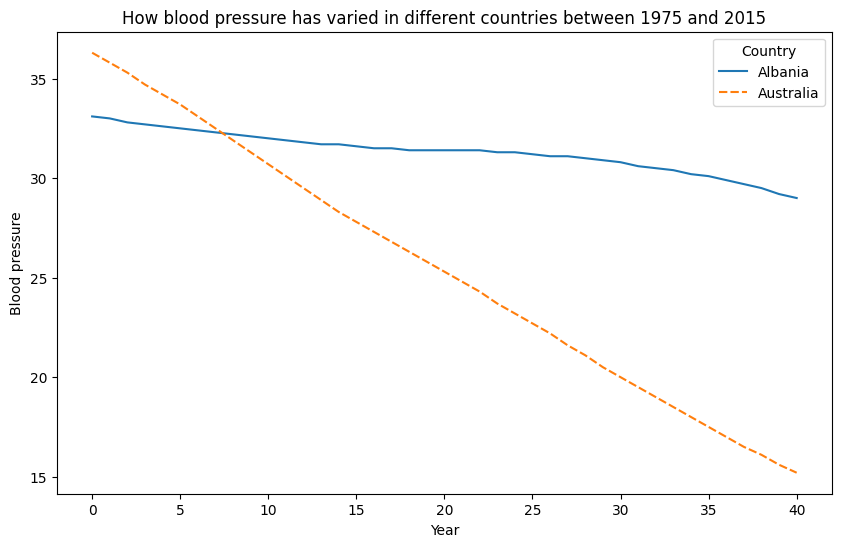

In [185]:
dimensions_and_labels()
setting_xticks()

sns.lineplot(data=df_both[['Albania', 'Australia']])